### Introduction
<p><img src="./datasets/book_cover.jpg" alt="The book cover of Peter and Wendy" style="width:183;height:253px;"/></p>
<h3 id="flyawaywithpeterpan">Fly away with Peter Pan!</h3>
<p>Peter Pan has been the companion of many children, and went a long way, starting as a Christmas play and ending up as a Disney classic. Did you know that although the play was titled "Peter Pan, Or The Boy Who Wouldn't Grow Up", J. M. Barrie's novel was actually titled "Peter and Wendy"? </p>
<p>You're going to explore and analyze Peter Pan's text to answer the question in the instruction pane below. You are working with the text version available here at <a href="https://www.gutenberg.org/files/16/16-h/16-h.htm">Project Gutenberg</a>. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><strong>Note:</strong> If you haven't completed a DataCamp project before you should check out the <a href="https://projects.datacamp.com/projects/33">Intro to Projects</a> first to learn about the interface. <a href="https://www.datacamp.com/courses/intermediate-importing-data-in-python">Intermediate Importing Data in Python</a> and <a href="https://www.datacamp.com/courses/introduction-to-natural-language-processing-in-python">Introduction to Natural Language Processing in Python</a> teach the skills required to complete this project. Should you decide to use them, English stopwords have been downloaded from <code>nltk</code> and are available for you in your environment.</p>

In [1]:
# Importing requests, BeautifulSoup, nltk, and Counter
import requests
import nltk

from bs4 import BeautifulSoup
from collections import Counter

### Request Peter Pan
To analyze Peter Pan, we need to get the contents of Peter Pan from somewhere. Luckily, the text is freely available online at Project Gutenberg as an HTML file:https://www.gutenberg.org/files/16/16-h/16-h.htm.

Note that HTML stands for Hypertext Markup Language and is the standard markup language for the web.

To fetch the HTML file with Moby Dick we're going to use the request package to make a GET request for the website, which means we're getting data from it. This is what you're doing through a browser when visiting a webpage, but now we're getting the requested page directly into Python instead.

In [2]:
url = "https://www.gutenberg.org/files/16/16-h/16-h.htm"
r = requests.get(url)

In [3]:
# Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

# Extracting the HTML from the request object
html = r.text

# Printing the first 2000 characters in html
print(html[0:2000])

﻿<?xml version="1.0" encoding="utf-8"?>

<!DOCTYPE html
   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >

<html xmlns="http://www.w3.org/1999/xhtml" lang="en">
  <head>
    <title>
      Peter Pan, by J. M. Barrie
    </title>
    <style type="text/css" xml:space="preserve">

    body { margin:5%; background:#faebd0; text-align:justify}
    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }
    blockquote {font-size: 97%; font-style: italic; margin-left: 10%; margin-right: 10%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}
    .toc       { margin-left: 10%; margin-bottom: .75em;}
    .toc2  

### Get the text from the HTML

In [4]:
soup = BeautifulSoup(html)
text= soup.get_text()
text[32000:33000]

"t,” and she was off before he could stop her. Immediately his\r\n      spirits sank in the strangest way.\r\n    \n\r\n      “John,” he said, shuddering, “it's most beastly stuff. It's that nasty,\r\n      sticky, sweet kind.”\r\n     \n\r\n      “It will soon be over, father,” John said cheerily, and then in rushed\r\n      Wendy with the medicine in a glass.\r\n    \n\r\n      “I have been as quick as I could,” she panted.\r\n    \n\r\n      “You have been wonderfully quick,” her father retorted, with a vindictive\r\n      politeness that was quite thrown away upon her. “Michael first,” he said\r\n      doggedly.\r\n    \n\r\n      “Father first,” said Michael, who was of a suspicious nature.\r\n    \n\r\n      “I shall be sick, you know,” Mr. Darling said threateningly.\r\n    \n\r\n      “Come on, father,” said John.\r\n    \n\r\n      “Hold your tongue, John,” his father rapped out.\r\n    \n\r\n      Wendy was quite puzzled. “I thought you took it quite easily, father.”\r\n     

### Extract the words
So we have the text of the novel. We removed unwanted characters at the start and at the end of html.

Now we will use nltk – the Natural Language Toolkit to count how many times each word appears. 
   - first tokenize the text with nltk.tokenize.RegexpTokenizer
   - and then split the text into a list of words.

In [5]:
# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenizing the text
tokens = tokenizer.tokenize(text)

# Printing out the first 8 words / tokens 
tokens[:20]

['Peter',
 'Pan',
 'by',
 'J',
 'M',
 'Barrie',
 'body',
 'margin',
 '5',
 'background',
 'faebd0',
 'text',
 'align',
 'justify',
 'P',
 'text',
 'indent',
 '1em',
 'margin',
 'top']

### Make the words lowercase

In [6]:
# Create a list called words containing all tokens transformed to lower-case
words=[]

for word in tokens:
    words.append(word.lower())

# Printing out the first 8 words / tokens 
words[:8]

['peter', 'pan', 'by', 'j', 'm', 'barrie', 'body', 'margin']

### Load in stop words
stop words is understood as words that appear a lot in the English language such as 'the', 'of' and 'a' so they're not so interesting. It is common practice to remove words.
- Use `stopwords` of nltk to remove such words

In [7]:
# Peter Pan is an English story so we get the English stop words from nltk
sw = nltk.corpus.stopwords.words('english')



### Remove stop words in Peter Pan

In [8]:
words_ns= []

for word in words:
    if word not in sw:
        words_ns.append(word)

words_ns[:10]

['peter',
 'pan',
 'j',
 'barrie',
 'body',
 'margin',
 '5',
 'background',
 'faebd0',
 'text']

### What are the top_ten words in the novel Peter Pan and how often do they occur?

In [9]:
count = Counter(words_ns)
top_ten= count.most_common(10)
top_ten

[('peter', 410),
 ('wendy', 362),
 ('said', 358),
 ('would', 219),
 ('one', 214),
 ('hook', 175),
 ('could', 142),
 ('cried', 136),
 ('john', 133),
 ('time', 126)]

#### Among the top ten most common meaningful words in the text, character names are:
> `protagonists= ['peter','wendy','hook', 'john' ]`

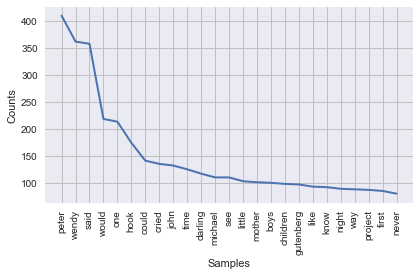

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(25)